In [48]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [49]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [50]:
x_train.shape

(60000, 28, 28)

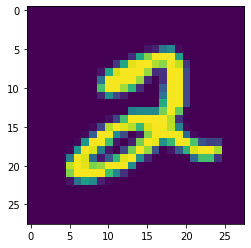

In [51]:
plt.imshow(x_train[5])

Reshaping the array to 4-dims so that it can work with the Keras API

In [52]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Normalizing the dataset for better result by Converting the pixel values of the dataset into value of (o,1)

In [53]:
x_train = x_train/255
x_test = x_test/255

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import numpy as np

initialize the CNN

In [55]:
model = Sequential()
model.add(Conv2D(64,kernel_size = (3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [57]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

Implimenting TensorBoard

In [58]:
tb = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq=1)

In [59]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32, callbacks= [tb])

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1192 - accuracy: 0.9635 - val_loss: 0.0549 - val_accuracy: 0.9830
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0407 - accuracy: 0.9874 - val_loss: 0.0319 - val_accuracy: 0.9872
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.0325 - val_accuracy: 0.9884
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0193 - accuracy: 0.9942 - val_loss: 0.0282 - val_accuracy: 0.9911
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0280 - val_accuracy: 0.9915
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0341 - val_accuracy: 0.9907
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0366 - val_accuracy:

In [60]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0471 - accuracy: 0.9912


[0.047077424824237823, 0.9911999702453613]

Use below command in command prompt from same folder to run tensorboard

tensorboard --logdir logs/               

logs/ is folder name

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
